In [3]:
import numpy as np
from glob import glob
from skimage.morphology import skeletonize_3d
from medutils.medutils import load_itk, save_itk
import SimpleITK as sitk
from tqdm import tqdm
import matplotlib.pyplot as plt

/home/jjia/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
itkskeleton = "/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_0068800_skeleton.mha"
mvlskeleton = "/home/jjia/data/dataset/lung_function/ori_resolution/GcVessel_binary_skeleton.mha"
itk = load_itk(itkskeleton)
mvl = load_itk(mvlskeleton)


(255852544,)


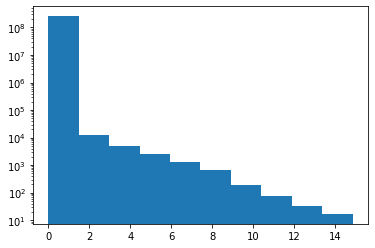

In [5]:
itk = itk.ravel()
print(itk.shape)
plt.figure()
plt.hist(itk, )
plt.yscale('log')
plt.show()

(255852544,)


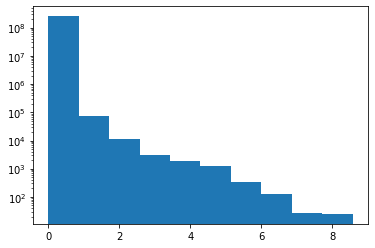

In [6]:
mvl = mvl.ravel()
print(mvl.shape)
plt.figure()
plt.hist(mvl, )
plt.yscale('log')
plt.show()